In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
Model=Sequential()

Model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))


Model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Flatten())

Model.add(Dense(128,activation='relu'))
Model.add(Dense(1,activation='sigmoid'))

Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
Train_DataGen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                )


In [5]:
Test_DataGen=ImageDataGenerator(rescale=1./255)

In [6]:
# MAKE TARGET SIZE EQUAL TO INPUT SIZE 
# DON'T EXCEED BATCH SIZE MORE THAN 32
Training_Set=Train_DataGen.flow_from_directory('Dataset/Training_Set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [7]:
Test_Set=Test_DataGen.flow_from_directory('Dataset/Test_Set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
# SAMPLES PER EPOCH:TRAINING SAMPLES
# NB VAL SAMPLES:TEST SAMPLES
Model.fit_generator(Training_Set,epochs=25,validation_data=(Test_Set))

Epoch 1/25
250/250 [==============================] - 73s 292ms/step - loss: 0.6842 - accuracy: 0.5545 - val_loss: 0.6448 - val_accuracy: 0.6205
Epoch 2/25
250/250 [==============================] - 67s 268ms/step - loss: 0.6173 - accuracy: 0.6524 - val_loss: 0.5706 - val_accuracy: 0.7060
Epoch 3/25
250/250 [==============================] - 64s 258ms/step - loss: 0.5690 - accuracy: 0.7029 - val_loss: 0.5430 - val_accuracy: 0.7275
Epoch 4/25
250/250 [==============================] - 96s 383ms/step - loss: 0.5342 - accuracy: 0.7322 - val_loss: 0.5470 - val_accuracy: 0.7235
Epoch 5/25
250/250 [==============================] - 103s 411ms/step - loss: 0.5081 - accuracy: 0.7498 - val_loss: 0.5365 - val_accuracy: 0.7365
Epoch 6/25
250/250 [==============================] - 103s 413ms/step - loss: 0.4810 - accuracy: 0.7666 - val_loss: 0.4758 - val_accuracy: 0.7695
Epoch 7/25
250/250 [==============================] - 103s 411ms/step - loss: 0.4687 - accuracy: 0.7769 - val_loss: 0.5427 - val

In [9]:
Model.history.history

{'loss': [0.6841858716011048,
  0.617327008843422,
  0.5689782537221909,
  0.5342323648929596,
  0.5080767841339111,
  0.48097561407089234,
  0.4686609569787979,
  0.45622732174396513,
  0.4287519348263741,
  0.407903622508049,
  0.40637797993421554,
  0.38369157803058623,
  0.3731629464626312,
  0.35116111558675767,
  0.34309394463896753,
  0.3174125779271126,
  0.30040590378642085,
  0.2994044914543629,
  0.2670647389292717,
  0.2575281387269497,
  0.2386737826168537,
  0.22899359776079656,
  0.21417148232460023,
  0.20493879291415215,
  0.1999796672910452],
 'accuracy': [0.5545,
  0.652375,
  0.702875,
  0.73225,
  0.74975,
  0.766625,
  0.776875,
  0.776375,
  0.79775,
  0.812125,
  0.812,
  0.823875,
  0.831375,
  0.844375,
  0.852,
  0.86225,
  0.86825,
  0.871,
  0.885375,
  0.89375,
  0.90225,
  0.9045,
  0.91075,
  0.918125,
  0.92025],
 'val_loss': [0.644802591157338,
  0.5706474251217313,
  0.5429968190571618,
  0.5470362192108518,
  0.5364801860044873,
  0.47580474331265404

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
Metrics=pd.DataFrame(Model.history.history)

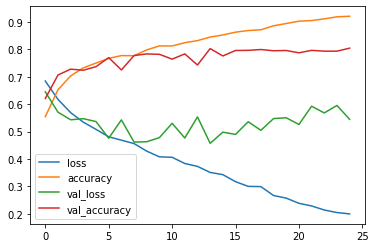

In [13]:
Metrics.plot()

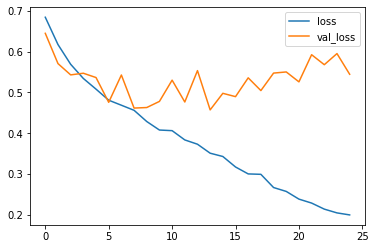

In [14]:
Metrics[['loss','val_loss']].plot()

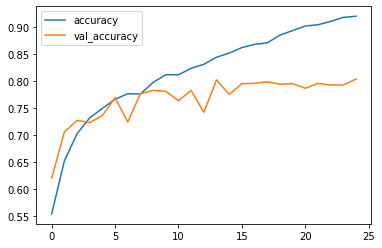

In [15]:
Metrics[['accuracy','val_accuracy']].plot()